In [131]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Custom Script Data

In [132]:
data = pd.read_csv('./../results/custom_script/introgression_summary_hmm.csv')
#remove acutifolius
acutGen = data.Genotype[data.Genotype.str.startswith('G40')].unique()
GCDT = data[~data['Genotype'].isin(acutGen)]
GCDT = GCDT.sort_values(['CHROM', 'pi'])
GCDT.head()

,CHROM,pi,pf,lp,gpi,gpf,lgp,nSNP,label,Genotype
29,Chr01,22587,811024,788437,0.088288,6.808886,6.720597,160,1,GCDT_235
119,Chr01,22587,3200705,3178118,0.190832,23.405697,23.214864,720,1,GCDT_249
171,Chr01,22587,3723887,3701300,0.061388,26.006376,25.944988,710,1,GCDT_163
245,Chr01,22587,379238,356651,0.185431,1.181436,0.996004,40,1,GCDT_175
324,Chr01,22587,826008,803421,0.164413,7.042711,6.878299,170,1,GCDT_183


In [3]:
genPosDf = pd.read_csv('./../data/custom_script/GCDT_plates_fix_Vulgaris_v2_Bi_Q40_Dp3_imiss83_NS99_MAF2_He2_annotated_gen_pos.csv')
genPosDf.rename(columns = ({'Chromosome':'CHROM', 'Position_bp': 'POS', 'Predicted_cM':'GENPOS'}), inplace=True)
minV = genPosDf.groupby('CHROM').min()
maxV = genPosDf.groupby('CHROM').max()
cumMax = np.cumsum(maxV['POS'])

chromSettings = pd.concat([minV['POS'],maxV['POS']], axis=1)
chromSettings['cumMax'] =cumMax
chromSettings.columns = ['min', 'max', 'cumMax']

NameError: name 'pd' is not defined

# NGSEP Data

In [134]:
data_NGSEP = pd.read_csv('./../results/NGSEP/GCDT_Acu_vul_introgressions.txt', sep='\t')
GCDT_NGSEP = data_NGSEP[(data_NGSEP['Haplotype group'] == 'Acutifolius') & (~data_NGSEP['Sample'].str.startswith('G40'))]
GCDT_NGSEP.head()

,Chr,First,Last,Sample,Sample group,Haplotype group,Total variants,Genotyped variants,Score Acutifolius,Score Vulgaris,Score self group
0,Chr01,72791,526435,GCDT_183,Vulgaris,Acutifolius,50,49,49,-49,-49
1,Chr01,72791,526435,GCDT_235,Vulgaris,Acutifolius,50,42,42,-42,-42
2,Chr01,72791,2901973,GCDT_249,Vulgaris,Acutifolius,350,343,343,-343,-343
4,Chr01,72791,3487853,GCDT_163,Vulgaris,Acutifolius,400,365,362,-362,-362
8,Chr01,526446,3487853,GCDT_198,Vulgaris,Acutifolius,350,350,334,-334,-334


# Compare Methods

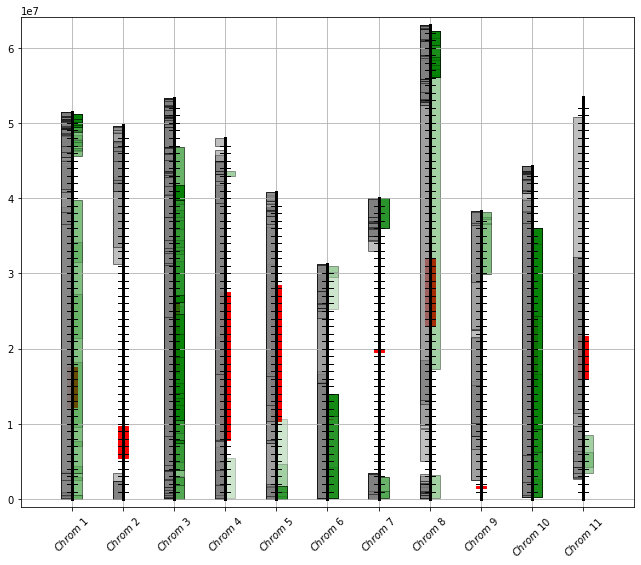

In [135]:
import matplotlib.path as mpath
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from matplotlib.collections import PatchCollection
from math import floor

centromeres = {'Chr01':[12300000,17500000],
'Chr02':[5430000,9690000],
'Chr03':[16800000,25900000],
'Chr04':[7820000,27500000],
'Chr05':[10400000,28500000],
'Chr06':[10660000,10680000],
'Chr07':[19600000,19800000],
'Chr08':[23200000,31900000],
'Chr09':[1500000,1740000],
'Chr10':[15000000,24500000],
'Chr11':[16100000,21700000]}

w=11
h=9

#plot by crhomosome
base = 0.2
fig = plt.figure(figsize=(w,h))
ax = fig.add_subplot(111)
for chrom,row in chromSettings.iterrows():
    #plot chromosome
    line = mlines.Line2D([base,base],[0,row['max']],color='k', lw=3,dash_capstyle='round')
    ax.add_line(line)
    #plot scale
    step=1000000
    n = floor(row['max']/step)
    wi = base - 0.02
    wf = base + 0.02
    for i in range(1,n):
        scale = mlines.Line2D([wi,wf],[i*step,i*step] ,color='k', lw=1,dash_capstyle='round')
        ax.add_line(scale)
    #plot centromere
    ci = centromeres[chrom][0]
    cf = centromeres[chrom][1]
    centromere = mpatches.Rectangle((wi,ci), 0.04, cf-ci,fill=True, color='r')
    ax.add_patch(centromere)
    
    sdf = GCDT_NGSEP[GCDT_NGSEP['Chr'] == chrom]
    for introId, row in sdf.iterrows():
        introgression = mpatches.Rectangle((base,row['First']), 0.04, row['Last']-row['First'],fill=True, alpha=0.2,facecolor='g', edgecolor='k',lw=1)
        ax.add_patch(introgression)
    
    sdf = GCDT[GCDT['CHROM'] == chrom]
    for introId, row in sdf.iterrows():
        introgression = mpatches.Rectangle((base-0.04,row['pi']), 0.04, row['pf']-row['pi'],fill=True, alpha=0.5,facecolor='gray', edgecolor='k',lw=1)
        ax.add_patch(introgression)
    base += 0.2

ax.set_ylim(-step,chromSettings['max'].max()+step)
ax.set_xlim(0,2.4)
ax.set_xticks(np.linspace(0.2,2.2, 11))
ax.set_xticklabels(['$Chrom\ %s$'% x for x in range(1,12)],rotation = 45, ha="center")
ax.grid()
plt.savefig('./../results/introgression_comparision_whole_hmm.pdf')

In [136]:
print('Custom Script detected introgressions in %s samples' % len(GCDT.Genotype.unique()))
print('NGSEP Script detected introgressions in %s sampless' % len(GCDT_NGSEP.Sample.unique()))


Custom Script detected introgressions in 201 samples
NGSEP Script detected introgressions in 108 sampless


In [137]:
minV = genPosDf.groupby('CHROM').min()
maxV = genPosDf.groupby('CHROM').max()
cumMax = np.cumsum(maxV['POS'])

rtios = list(maxV['POS']/cumMax[-1])

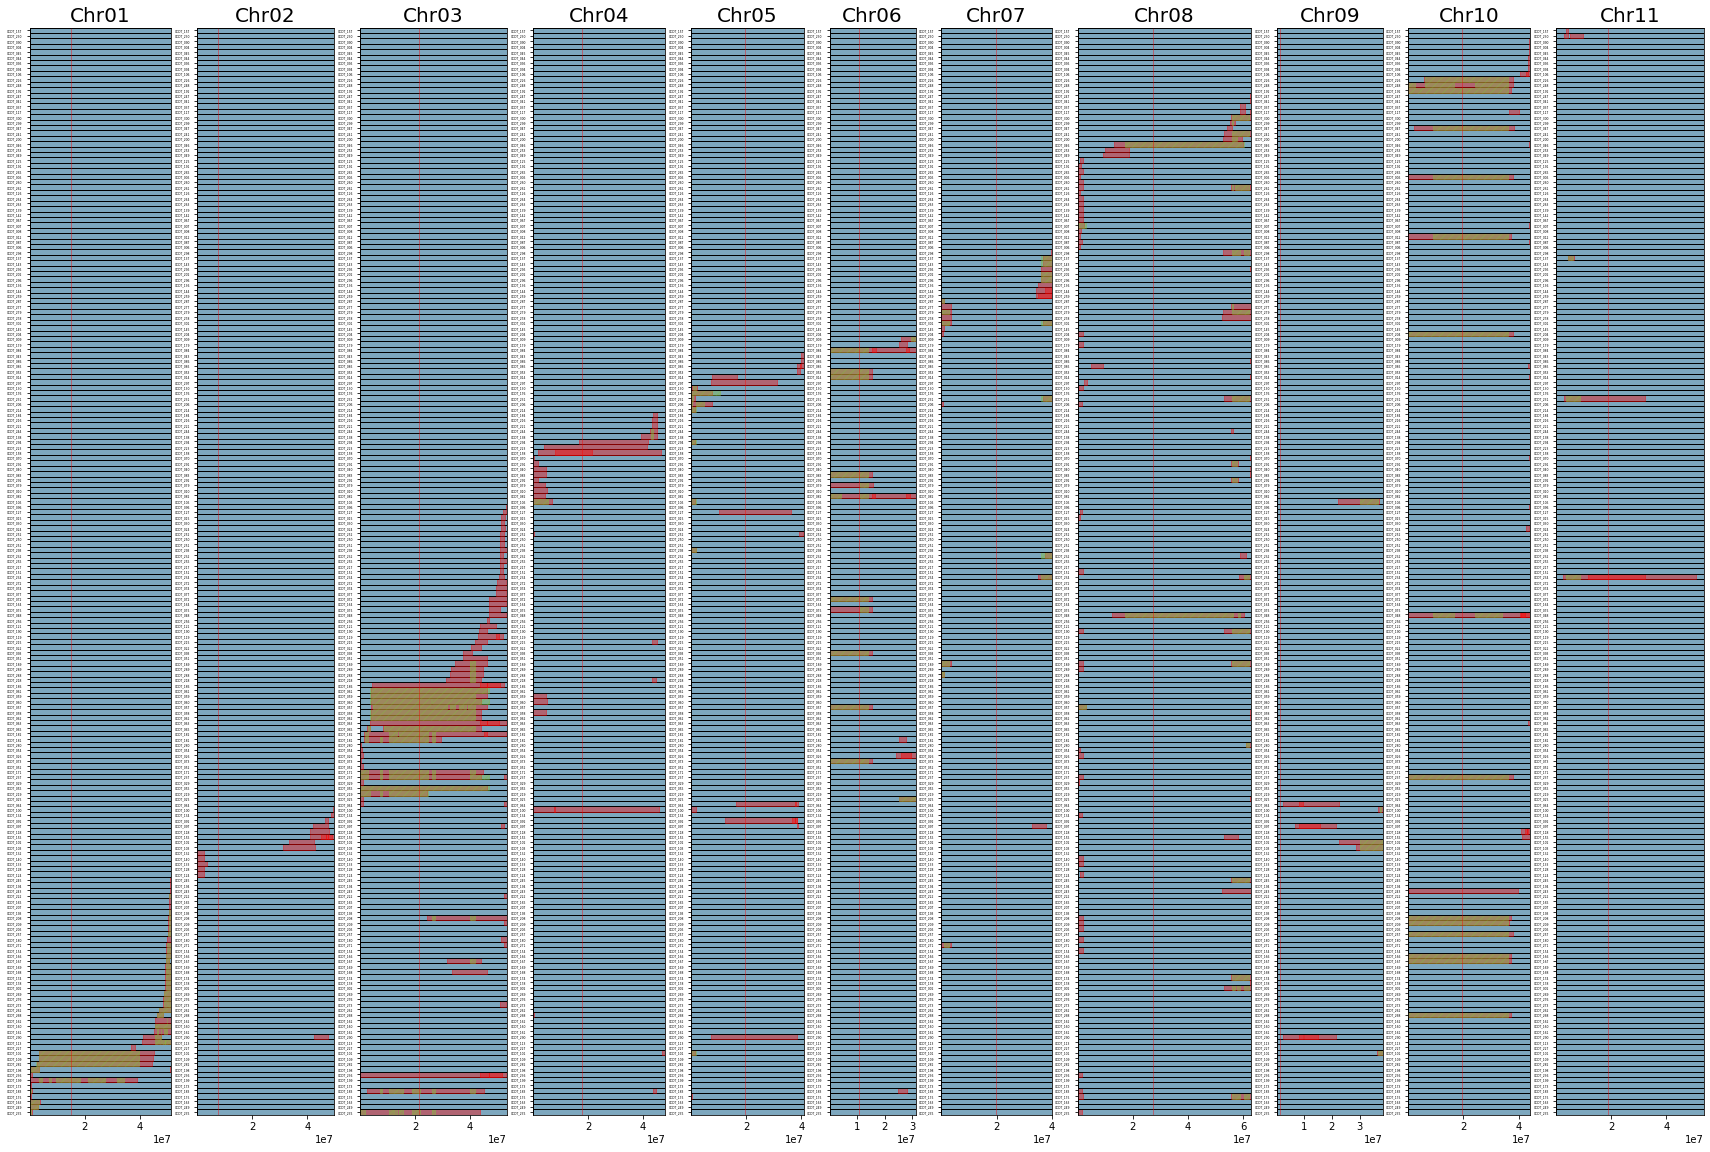

In [138]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines

centromeres = {'Chr01':[12300000,17500000],
'Chr02':[5430000,9690000],
'Chr03':[16800000,25900000],
'Chr04':[7820000,27500000],
'Chr05':[10400000,28500000],
'Chr06':[10660000,10680000],
'Chr07':[19600000,19800000],
'Chr08':[23200000,31900000],
'Chr09':[1500000,1740000],
'Chr10':[15000000,24500000],
'Chr11':[16100000,21700000]}

ycoods = dict()
for n,i in enumerate(GCDT.Genotype.unique()):
    ycoods[i] = n

colors = {
        'coccineus' : '#D36647',
        'acutifolius' : '#82BF40',
        'bg' : '#7DA7BE'
    }
nsamples = len(GCDT.Genotype.unique())

fig, axs = plt.subplots(1,11, sharey=False, gridspec_kw={'width_ratios': rtios},figsize=(30,20))
count = 0
for chrom, row in chromSettings.iterrows():
    introCHROM = GCDT[GCDT['CHROM'] == chrom]
    introCHROM_NGSEP = GCDT_NGSEP[GCDT_NGSEP['Chr'] == chrom]
    centromereX = np.average(centromeres[chrom])
    line = mlines.Line2D([centromereX,centromereX],[0,nsamples] ,color='r', lw=1, alpha=0.4)
    axs[count].add_line(line)
    #set Chromosomes for each sample
    for i in ycoods.keys():
        xy = (row['min'], ycoods[i])
        width = row['max'] - row['min']
        r = mpatches.Rectangle(xy, width, 1, facecolor = colors['bg'], edgecolor='k')
        axs[count].add_patch(r)
        
        introGen = introCHROM[introCHROM['Genotype']==i]
        for idIntro, irow in introGen.iterrows():
            xy = (irow['pi'], ycoods[i])
            width =  irow['pf'] - irow['pi']
            r = mpatches.Rectangle(xy, width, 1, color = 'r',alpha=0.4)
            axs[count].add_patch(r)




        try:
            introGen = introCHROM_NGSEP[introCHROM_NGSEP['Sample']==i]
            for idIntro, irow in introGen.iterrows():
                xy = (irow['First'], ycoods[i])
                width =  irow['Last'] - irow['First']
                r = mpatches.Rectangle(xy, width, 1, color = colors['acutifolius'],hatch='///',alpha=0.4)
                axs[count].add_patch(r)

        except Exception as e:
            print(e)

    
    
    
    
    
    
    axs[count].set_xlim((row['min'],row['max']))
    axs[count].set_ylim((0,nsamples))
    axs[count].set_yticks(np.linspace(0.5,nsamples-0.5,nsamples))
    axs[count].set_yticklabels(GCDT.Genotype.unique(), size=3)
    axs[count].set_title(chrom, size=20)
    count += 1
plt.savefig('./../results/introgression_comparision_hmm.pdf')